In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt("notas_andes.dat")

In [3]:
#Problema de Clasificación Binario
target = np.ones(len(data))
ii = data[:,4]<4.0
target[ii] = 0 
target[~ii] = 1

In [4]:
X = data[:,:4]
np.shape(X)

(69, 4)

In [5]:
import sklearn.tree
from sklearn.model_selection import KFold

### 5-Fold
<img src="https://www.askpython.com/wp-content/uploads/2020/11/5-Fold-Cross-Validation.jpg.webp" style="height: 500px; width:800px;"/>

In [6]:
N = 5
max_depths = np.linspace(1,N,N)
max_depths

array([1., 2., 3., 4., 5.])

In [7]:
Error_train = []
Error_test = []

for md in max_depths:
    clf = sklearn.tree.DecisionTreeClassifier(max_depth=md)
    kf = KFold(n_splits=5)
    kf.get_n_splits(X)
    
    F1_train = []
    F1_test = []
    
    k = 0
    for train_index, test_index in kf.split(X):
        if k==0: print("Train Index:", train_index, "Test Index:", test_index, "\n")
        X_train, X_test = X[train_index], X[test_index]
        target_train, target_test = target[train_index], target[test_index]
        clf.fit(X_train, target_train)       
        F1_train.append(sklearn.metrics.f1_score(target_train, clf.predict(X_train)))
        F1_test.append(sklearn.metrics.f1_score(target_test, clf.predict(X_test)))
        k +=1
    
    Error_train.append(np.average(F1_train))
    Error_test.append(np.average(F1_test))

Train Index: [14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68] Test Index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] 

Train Index: [14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68] Test Index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] 

Train Index: [14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68] Test Index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] 

Train Index: [14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68] Test Index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] 

Train Index: [14 15 16 17 18 19 20 21 22

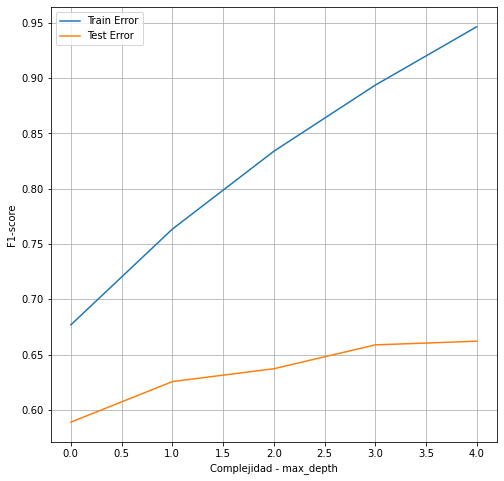

In [8]:
fig = plt.figure(figsize=(8,8))
plt.plot(Error_train, label="Train Error")
plt.plot(Error_test, label="Test Error")
plt.grid()
plt.legend()
plt.xlabel('Complejidad - max_depth')
plt.ylabel('F1-score')
plt.show()